# Data-Driven Agricultural Yield Optimization in Nigeria

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skew, shapiro

## Data Exploratory 

In [150]:
# Import data into dataframe
df = pd.read_excel("Maji Ndogo Dataset.xlsx")
df

,Field_ID,Elevation,Latitude,Longitude,Location,Slope,Rainfall,Min_temperature_C,Max_temperature_C,Ave_temps,Soil_fertility,Soil_type,pH,Pollution_level,Plot_size,Crop_type,Annual_yield,Standard_yield
0,40734,786.05580,-7.389911,-7.556202,Rural_Akatsi,14.795113,1125.2,-3.1,33.1,15.00,0.62,Sandy,6.169393,8.526684e-02,1.3,0.751354,cassava,0.577964
1,30629,674.33410,-7.736849,-1.051539,Rural_Sokoto,11.374611,1450.7,-3.9,30.6,13.35,0.64,Volcanic,5.676648,3.996838e-01,2.2,1.069865,cassava,0.486302
2,39924,826.53390,-9.926616,0.115156,Rural_Sokoto,11.339692,2208.9,-1.8,28.4,13.30,0.69,Volcanic,5.331993,3.580286e-01,3.4,2.208801,tea,0.649647
3,5754,574.94617,-2.420131,-6.592215,Rural_Kilimani,7.109855,328.8,-5.8,32.2,13.20,0.54,Loamy,5.328150,2.866871e-01,2.4,1.277635,cassava,0.532348
4,14146,886.35300,-3.055434,-7.952609,Rural_Kilimani,55.007656,785.2,-2.5,31.0,14.25,0.72,Sandy,5.721234,4.319027e-02,1.5,0.832614,wheat,0.555076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5649,11472,681.36145,-7.358371,-6.254369,Rural_Akatsi,16.213196,885.7,-4.3,33.4,14.55,0.61,Sandy,5.741063,3.286828e-01,1.1,0.609930,potato,0.554482
5650,19660,667.02120,-3.154559,-4.475046,Rural_Kilimani,2.397553,501.1,-4.8,32.1,13.65,0.54,Sandy,5.445833,1.602583e-01,8.7,3.812289,maize,0.438194
5651,41296,670.77900,-14.472861,-6.110221,Rural_Hawassa,7.636470,1586.6,-3.8,33.4,14.80,0.64,Volcanic,5.385873,8.221326e-09,2.1,1.681629,tea,0.800776
5652,33090,429.48840,-14.653089,-6.984116,Rural_Hawassa,13.944720,1272.2,-6.2,34.6,14.20,0.63,Silt,5.562508,6.917245e-10,1.3,0.659874,cassava,0.507595


In [151]:
df.columns

Index(['Field_ID', 'Elevation', 'Latitude', 'Longitude', 'Location', 'Slope',
       'Rainfall', 'Min_temperature_C', 'Max_temperature_C', 'Ave_temps',
       'Soil_fertility', 'Soil_type', 'pH', 'Pollution_level', 'Plot_size',
       'Crop_type', 'Annual_yield', 'Standard_yield'],
      dtype='object')

In [152]:
# List the datatype of each column
df.dtypes

Field_ID               int64
Elevation            float64
Latitude             float64
Longitude            float64
Location              object
Slope                float64
Rainfall             float64
Min_temperature_C    float64
Max_temperature_C    float64
Ave_temps            float64
Soil_fertility       float64
Soil_type             object
pH                   float64
Pollution_level      float64
Plot_size            float64
Crop_type            float64
Annual_yield          object
Standard_yield       float64
dtype: object

In [153]:
# Get the statistical breakdown of the Quantitative Variables
df.describe()

,Field_ID,Elevation,Latitude,Longitude,Slope,Rainfall,Min_temperature_C,Max_temperature_C,Ave_temps,Soil_fertility,pH,Pollution_level,Plot_size,Crop_type,Standard_yield
count,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5654.000000,5643.000000,5636.000000,5654.000000,5654.000000,5654.000000,5.654000e+03,5654.000000,5654.000000,5654.000000
mean,22632.733817,625.468485,-7.026330,-4.365755,11.742669,1201.943244,-4.410828,30.856920,13.222550,0.619308,5.607073,2.231923e-01,3.923965,2.090399,0.534405
std,13133.762515,213.768160,3.515839,2.706603,9.540599,499.782824,1.534329,1.884748,0.801636,0.044791,0.789215,2.237976e-01,3.463855,1.935000,0.111806
min,1.000000,-878.860800,-15.009038,-10.015722,0.097316,103.100000,-9.700000,24.500000,10.250000,0.510000,3.700337,1.013245e-10,0.500000,0.172226,0.170717
25%,11463.250000,520.125410,-9.674298,-6.708209,4.860120,773.175000,-5.500000,29.600000,12.700000,0.590000,5.030630,5.133734e-02,1.500000,0.767032,0.460386
50%,22615.500000,661.308975,-7.205178,-4.463785,9.104626,1200.600000,-4.300000,30.800000,13.200000,0.620000,5.602896,1.647056e-01,2.800000,1.446648,0.528836
75%,34077.750000,763.366200,-4.182984,-2.015527,15.953242,1625.425000,-3.300000,32.100000,13.750000,0.650000,6.162058,3.058885e-01,4.700000,2.530662,0.599942
max,45153.000000,1122.252100,0.260756,1.696276,79.865960,2470.900000,-0.100000,37.800000,17.300000,0.820000,7.499959,9.954134e-01,15.000000,12.695224,0.898037


In [154]:
# Get the statistical breakdown of the categorical variables
df.describe(include=['object'])

,Location,Soil_type,Annual_yield
count,5654,5654,5654
unique,5,6,14
top,Rural_Kilimani,Sandy,wheat
freq,2020,1563,1316


In [155]:
# Find out the number of Rows and Columns
df.shape

(5654, 18)

In [156]:
# Additional exploratory analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5654 entries, 0 to 5653
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Field_ID           5654 non-null   int64  
 1   Elevation          5654 non-null   float64
 2   Latitude           5654 non-null   float64
 3   Longitude          5654 non-null   float64
 4   Location           5654 non-null   object 
 5   Slope              5654 non-null   float64
 6   Rainfall           5654 non-null   float64
 7   Min_temperature_C  5643 non-null   float64
 8   Max_temperature_C  5636 non-null   float64
 9   Ave_temps          5654 non-null   float64
 10  Soil_fertility     5654 non-null   float64
 11  Soil_type          5654 non-null   object 
 12  pH                 5654 non-null   float64
 13  Pollution_level    5654 non-null   float64
 14  Plot_size          5654 non-null   float64
 15  Crop_type          5654 non-null   float64
 16  Annual_yield       5654 

### Outliers

In [157]:
# Subset data to get numeric columns only
dff = df.copy()
dff = dff.select_dtypes(include=['int64', 'float64'])

In [158]:
# Create empty list to hold outliers list
outlier_counts = {}

# Create for loop to loop through columns and get the count of outliers
for column in dff.columns:

     # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = dff[column].quantile(0.25)
    Q3 = dff[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outliers = dff[(dff[column] < lower_bound) | (dff[column] > upper_bound)]
    outlier_counts[column] = outliers.shape[0]

outlier_counts


{'Field_ID': 0,
 'Elevation': 96,
 'Latitude': 0,
 'Longitude': 0,
 'Slope': 219,
 'Rainfall': 0,
 'Min_temperature_C': 21,
 'Max_temperature_C': 32,
 'Ave_temps': 48,
 'Soil_fertility': 42,
 'pH': 0,
 'Pollution_level': 389,
 'Plot_size': 594,
 'Crop_type': 542,
 'Standard_yield': 114}

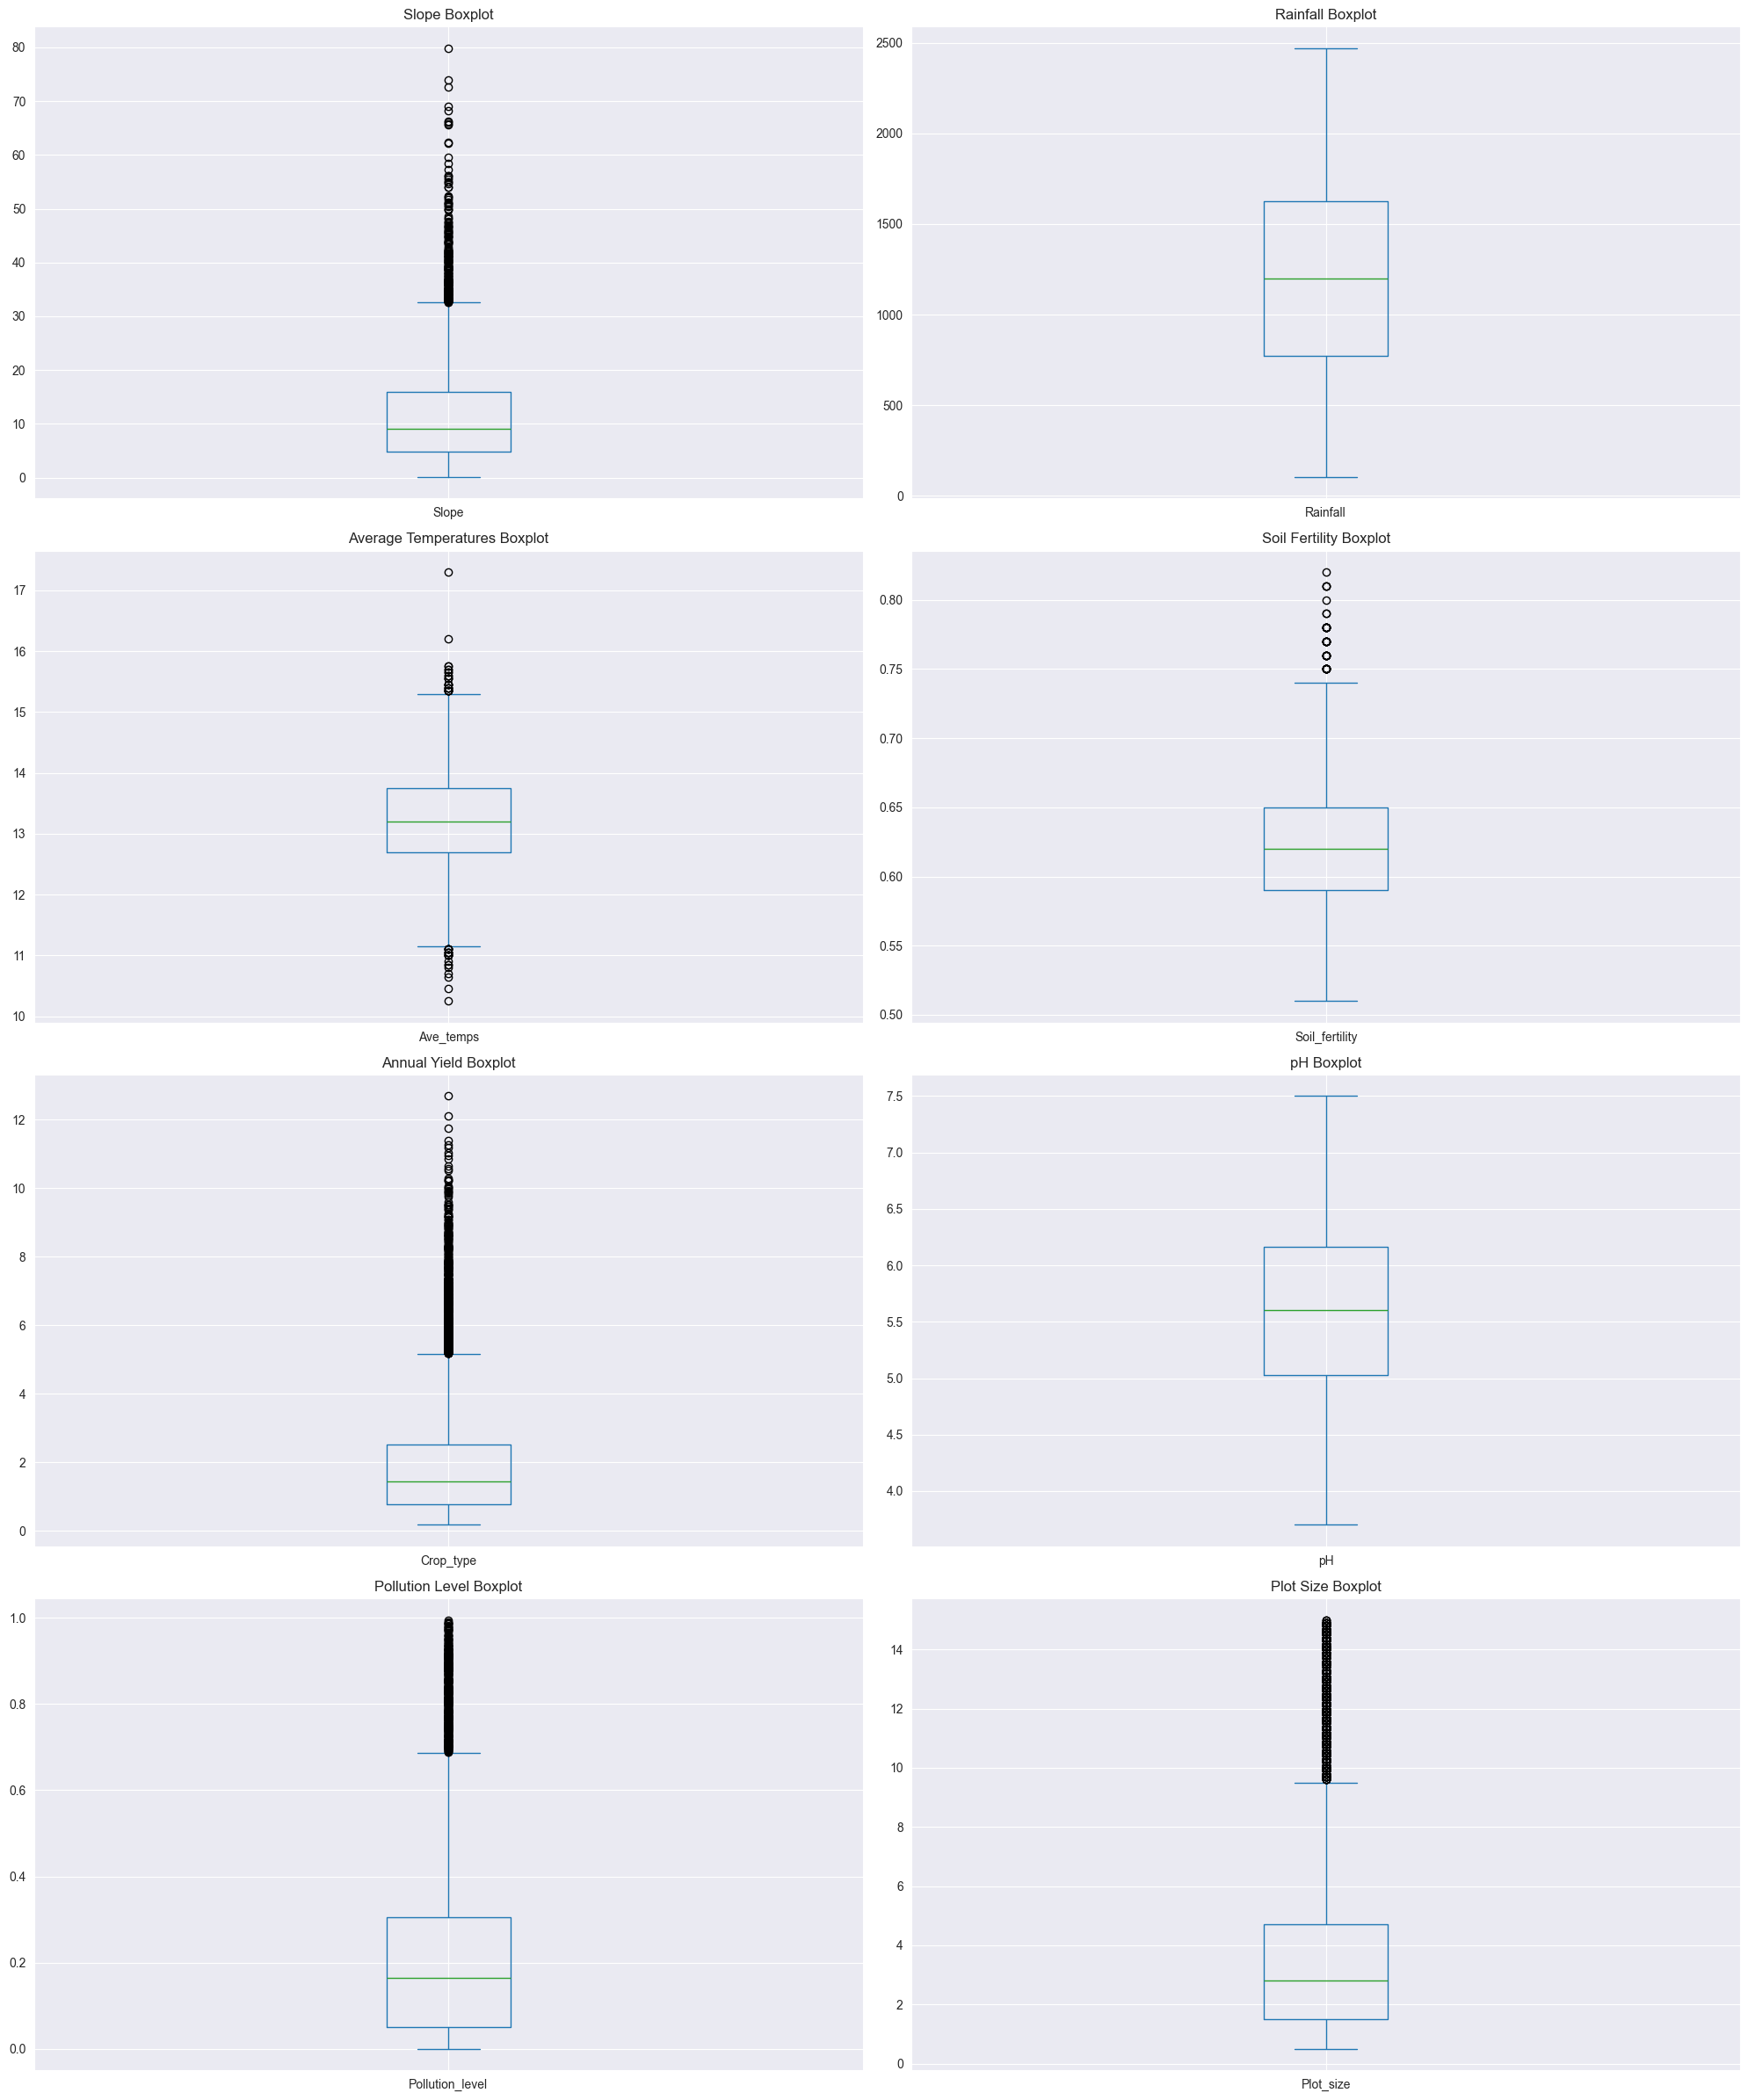

In [159]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 24))

# Plotting different plots in each subplot
df['Slope'].plot(ax=axes[0, 0], kind='box', title='Slope Boxplot')
df['Rainfall'].plot(ax=axes[0, 1], kind='box', title='Rainfall Boxplot')
df['Ave_temps'].plot(ax=axes[1, 0], kind='box', title='Average Temperatures Boxplot')
df['Soil_fertility'].plot(ax=axes[1, 1], kind='box', title='Soil Fertility Boxplot')
df['Crop_type'].plot(ax=axes[2, 0], kind='box', title='Annual Yield Boxplot')
df['pH'].plot(ax=axes[2, 1], kind='box', title='pH Boxplot')
df['Pollution_level'].plot(ax=axes[3, 0], kind='box', title='Pollution Level Boxplot')
df['Plot_size'].plot(ax=axes[3, 1], kind='box', title='Plot Size Boxplot')

# Adjust layout to prevent overlap of titles
plt.tight_layout()

# Show the plots
plt.show()

### Missing Values

In [160]:
# Find the number of missing values
df.isna().sum().sum()

np.int64(29)

In [161]:
# Return columns that have empty values
df.isnull().any()

Field_ID             False
Elevation            False
Latitude             False
Longitude            False
Location             False
Slope                False
Rainfall             False
Min_temperature_C     True
Max_temperature_C     True
Ave_temps            False
Soil_fertility       False
Soil_type            False
pH                   False
Pollution_level      False
Plot_size            False
Crop_type            False
Annual_yield         False
Standard_yield       False
dtype: bool

It is noticed that 'Min_temperature_C' and 'Max_temperature_C' columns have missing values


In [162]:
# Find the percentage of missing values
percent_missing = df.isnull().sum() * 100 / len(df)
print(percent_missing)

Field_ID             0.000000
Elevation            0.000000
Latitude             0.000000
Longitude            0.000000
Location             0.000000
Slope                0.000000
Rainfall             0.000000
Min_temperature_C    0.194553
Max_temperature_C    0.318359
Ave_temps            0.000000
Soil_fertility       0.000000
Soil_type            0.000000
pH                   0.000000
Pollution_level      0.000000
Plot_size            0.000000
Crop_type            0.000000
Annual_yield         0.000000
Standard_yield       0.000000
dtype: float64


## Data Cleaning

### Column Accuracy

In [163]:
# "Crop_type" and "Annual_yield" have their columns interchanged. Fix that.
# Changing the Column names that are not accurate
df.rename(columns={'Crop_type': 'Annual_yield', 'Annual_yield': 'Crop_type'}, inplace=True)
df

,Field_ID,Elevation,Latitude,Longitude,Location,Slope,Rainfall,Min_temperature_C,Max_temperature_C,Ave_temps,Soil_fertility,Soil_type,pH,Pollution_level,Plot_size,Annual_yield,Crop_type,Standard_yield
0,40734,786.05580,-7.389911,-7.556202,Rural_Akatsi,14.795113,1125.2,-3.1,33.1,15.00,0.62,Sandy,6.169393,8.526684e-02,1.3,0.751354,cassava,0.577964
1,30629,674.33410,-7.736849,-1.051539,Rural_Sokoto,11.374611,1450.7,-3.9,30.6,13.35,0.64,Volcanic,5.676648,3.996838e-01,2.2,1.069865,cassava,0.486302
2,39924,826.53390,-9.926616,0.115156,Rural_Sokoto,11.339692,2208.9,-1.8,28.4,13.30,0.69,Volcanic,5.331993,3.580286e-01,3.4,2.208801,tea,0.649647
3,5754,574.94617,-2.420131,-6.592215,Rural_Kilimani,7.109855,328.8,-5.8,32.2,13.20,0.54,Loamy,5.328150,2.866871e-01,2.4,1.277635,cassava,0.532348
4,14146,886.35300,-3.055434,-7.952609,Rural_Kilimani,55.007656,785.2,-2.5,31.0,14.25,0.72,Sandy,5.721234,4.319027e-02,1.5,0.832614,wheat,0.555076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5649,11472,681.36145,-7.358371,-6.254369,Rural_Akatsi,16.213196,885.7,-4.3,33.4,14.55,0.61,Sandy,5.741063,3.286828e-01,1.1,0.609930,potato,0.554482
5650,19660,667.02120,-3.154559,-4.475046,Rural_Kilimani,2.397553,501.1,-4.8,32.1,13.65,0.54,Sandy,5.445833,1.602583e-01,8.7,3.812289,maize,0.438194
5651,41296,670.77900,-14.472861,-6.110221,Rural_Hawassa,7.636470,1586.6,-3.8,33.4,14.80,0.64,Volcanic,5.385873,8.221326e-09,2.1,1.681629,tea,0.800776
5652,33090,429.48840,-14.653089,-6.984116,Rural_Hawassa,13.944720,1272.2,-6.2,34.6,14.20,0.63,Silt,5.562508,6.917245e-10,1.3,0.659874,cassava,0.507595


### Check for errors in the 'Crop_Type' and 'Location' Columns

In [164]:
#  Remove locations with insufficient data
min_records_per_location = 10
location_counts = df['Location'].value_counts()
valid_locations = location_counts[location_counts >= min_records_per_location].index
df = df[df['Location'].isin(valid_locations)]

In [165]:
# Ensure consistency and Check for errors in the 'Crop_Type' Column
df['Crop_type'] = df['Crop_type'].str.strip().str.title()
print(sorted(df["Crop_type"].unique()))

['Banana', 'Cassava', 'Cassaval', 'Coffee', 'Maize', 'Potato', 'Rice', 'Tea', 'Teaa', 'Wheat', 'Wheatn']


In [166]:
# Correct the errors in the "Crop_type" column
df['Crop_type'] = df['Crop_type'].replace({'Teaa': 'Tea', 'Cassaval': 'Cassava', 'Wheatn': 'Wheat'})

In [167]:
# Now Check again
print(sorted(df["Crop_type"].unique()))

['Banana', 'Cassava', 'Coffee', 'Maize', 'Potato', 'Rice', 'Tea', 'Wheat']


In [168]:
# Ensure consistency and Check for errors in the 'Location' Column
df['Location'] = df['Location'].str.strip().str.title()
print(sorted(df["Location"].unique()))

['Rural_Akatsi', 'Rural_Amanzi', 'Rural_Hawassa', 'Rural_Kilimani', 'Rural_Sokoto']


In [169]:
# Ensuring data quality and validity
# Remove duplicates
df.drop_duplicates(inplace=True)

### Handle Outliers

### Handle Missing Values

#### Use the mean of Minimum temperature by location to fill in missing minimum values

In [170]:
# Calculate the mean minimum temperature for each location
mean_min_temperatures = df.groupby('Location')['Min_temperature_C'].mean()

# Fill missing values with the mean minimum temperature of respective locations
df['Min_temperature_C'] = df.apply(lambda row: mean_min_temperatures[row['Location']] if pd.isnull(row['Min_temperature_C']) else row['Min_temperature_C'], axis=1)


#### Use the mean of Maximum temperature by location to fill in missing maximum values

In [171]:
# Calculate the mean maximum temperature for each location
mean_max_temperatures = df.groupby('Location')['Max_temperature_C'].mean()

# Fill missing values with the mean maximum temperature of respective locations
df['Max_temperature_C'] = df.apply(lambda row: mean_max_temperatures[row['Location']] if pd.isnull(row['Max_temperature_C']) else row['Max_temperature_C'], axis=1)


In [172]:
# Confirm that all missing values have been handled.
df.isna().sum().sum()

np.int64(0)

In [173]:
# Save the cleaned DataFrame to a new CSV file
df.to_csv('Maji Ndogo Dataset_Cleaned.csv', index=False)

## Metrics and KPIs

### Metrics

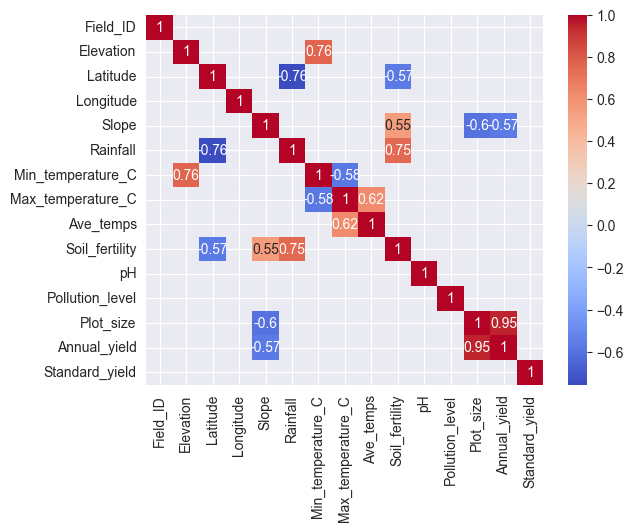

In [174]:
# find the correlation of variables in the dataset
corr = df.corr(numeric_only=True)
# Take in only correlations moderate to high
corr = corr[(corr>=0.5) | (corr<= -0.5)]
# generate a heatmap for the correlated data
sns.heatmap(corr, cmap='coolwarm', annot=True)
# Show the plot
plt.show()

In [175]:
corr = corr[corr != 1]
corr= corr.abs().unstack().sort_values(ascending=False)
corr_top_15 = corr.head(15)
print(corr_top_15)

Annual_yield       Plot_size            0.949441
Plot_size          Annual_yield         0.949441
Min_temperature_C  Elevation            0.763313
Elevation          Min_temperature_C    0.763313
Rainfall           Latitude             0.756442
Latitude           Rainfall             0.756442
Rainfall           Soil_fertility       0.752914
Soil_fertility     Rainfall             0.752914
Max_temperature_C  Ave_temps            0.621390
Ave_temps          Max_temperature_C    0.621390
Slope              Plot_size            0.603773
Plot_size          Slope                0.603773
Min_temperature_C  Max_temperature_C    0.576505
Max_temperature_C  Min_temperature_C    0.576505
Slope              Annual_yield         0.571007
dtype: float64


#### Identify key metrics

In [176]:
# The key metrics are the average of: annual yield, soil fertility, Slope, Rainfall, Ave_temps, 
# pH, Pollution_level, Plot_size
metrics = df.groupby(['Crop_type', 'Location']).agg({
    'Annual_yield': 'mean',
    'Soil_fertility': 'mean',
    'Slope': 'mean',
    'Rainfall': 'mean',
    'Ave_temps': 'mean',
    'pH': 'mean',
    'Pollution_level': 'mean',
    'Plot_size': 'mean'
}).reset_index()
metrics

,Crop_type,Location,Annual_yield,Soil_fertility,Slope,Rainfall,Ave_temps,pH,Pollution_level,Plot_size
0,Banana,Rural_Akatsi,1.858688,0.658204,10.919323,1754.923353,13.403293,6.254463,0.070332,3.954491
1,Banana,Rural_Hawassa,1.922905,0.641577,9.610611,1580.080757,13.151420,6.115038,0.039108,4.463722
2,Banana,Rural_Kilimani,2.254991,0.597273,7.935109,1058.363636,13.040909,5.759564,0.174271,4.309091
3,Banana,Rural_Sokoto,2.321132,0.657899,10.279885,1776.235507,13.614493,5.440984,0.296506,4.484058
4,Cassava,Rural_Akatsi,1.493480,0.626265,11.808143,1294.025301,13.539759,5.169879,0.100915,3.200000
5,Cassava,Rural_Amanzi,2.104996,0.610000,14.275848,981.890909,14.027273,5.174773,0.235683,4.090909
6,Cassava,Rural_Hawassa,2.086399,0.615285,9.977560,1225.076829,13.229268,5.128200,0.175095,4.413415
7,Cassava,Rural_Kilimani,2.057868,0.604737,9.530178,1100.171930,13.630044,5.230696,0.398673,4.295175
8,Cassava,Rural_Sokoto,1.585533,0.634423,12.421017,1375.691346,13.477885,5.144751,0.558524,3.619231
9,Coffee,Rural_Akatsi,1.832454,0.657589,11.777326,1709.964539,13.465248,6.259349,0.076625,3.636879


### KPIs

In [177]:
# Yield Per Unit Area
# Measures productivity of a plot.
metrics['KPI_Yield_per_unit_area'] = metrics['Annual_yield'] / metrics['Plot_size']

In [178]:
# Let's Focus on this KPI and compare it with the overall KPI
focus_kpi = metrics.copy()
focus_kpi_location = focus_kpi.loc[focus_kpi.groupby('Crop_type')['KPI_Yield_per_unit_area'].idxmax()]
# Display the best locations for each crop type by this kpi
print(focus_kpi_location[['Crop_type', 'Location', 'KPI_Yield_per_unit_area']])

   Crop_type        Location  KPI_Yield_per_unit_area
2     Banana  Rural_Kilimani                 0.523310
5    Cassava    Rural_Amanzi                 0.514555
13    Coffee    Rural_Sokoto                 0.523990
16     Maize   Rural_Hawassa                 0.545589
21    Potato   Rural_Hawassa                 0.588879
26      Rice    Rural_Sokoto                 0.665754
31       Tea    Rural_Sokoto                 0.725287
35     Wheat  Rural_Kilimani                 0.539064


In [179]:
# Water Use Efficiency 
# Evaluates yield in relation to rainfall, showing how effectively water is used.
metrics['KPI_Water_Use_Efficiency'] = metrics['Annual_yield'] / metrics['Rainfall']

In [180]:
# Temperature Impact Index 
# Assesses how temperatures affect yield, combining min, max, and average temperatures.
metrics['KPI_Temp_Impact_Index'] = metrics['Annual_yield'] / metrics['Ave_temps']

In [181]:
# Soil Fertility Yield Ratio
# Correlates soil fertility to yield, indicating how soil quality affects productivity
metrics['KPI_Soil_Fertility_Yield_Ratio'] = metrics['Annual_yield'] / metrics['Soil_fertility']

In [182]:
# Pollution Impact on Yield
# Evaluates the effect of pollution levels on yield, important for sustainable farming
metrics['KPI_Pollution_Impact'] = metrics['Annual_yield'] / metrics['Pollution_level']

In [183]:
# Total KPI
# Find the total KPI to see the best location for each crop type
metrics['KPI_Total'] = (metrics['KPI_Yield_per_unit_area']+metrics['KPI_Water_Use_Efficiency']+metrics['KPI_Temp_Impact_Index']+metrics['KPI_Soil_Fertility_Yield_Ratio']+metrics['KPI_Pollution_Impact'])/5

In [184]:
# Normalize KPIs
# Normalization ensures that all KPIs contribute equally to the final performance metric.
kpi_columns = [
    'KPI_Yield_per_unit_area', 'KPI_Water_Use_Efficiency', 'KPI_Temp_Impact_Index',
    'KPI_Soil_Fertility_Yield_Ratio', 'KPI_Pollution_Impact'
]
scaler = MinMaxScaler()
metrics[kpi_columns] = scaler.fit_transform(metrics[kpi_columns])

In [185]:
# Aggregate KPIs (sum of all KPIs)
metrics['Total KPI'] = metrics[kpi_columns].sum(axis=1)

In [186]:
# Determine the best location for each crop type based on highest total KPI
best_locations = metrics.loc[metrics.groupby('Crop_type')['Total KPI'].idxmax()]

# Display the best locations for each crop type
print(best_locations[['Crop_type', 'Location', 'Total KPI']])

   Crop_type        Location  Total KPI
2     Banana  Rural_Kilimani   2.116307
5    Cassava    Rural_Amanzi   1.845563
13    Coffee    Rural_Sokoto   1.819084
14     Maize    Rural_Akatsi   2.686210
23    Potato    Rural_Sokoto   3.402637
25      Rice   Rural_Hawassa   3.129785
31       Tea    Rural_Sokoto   2.749801
35     Wheat  Rural_Kilimani   2.233073


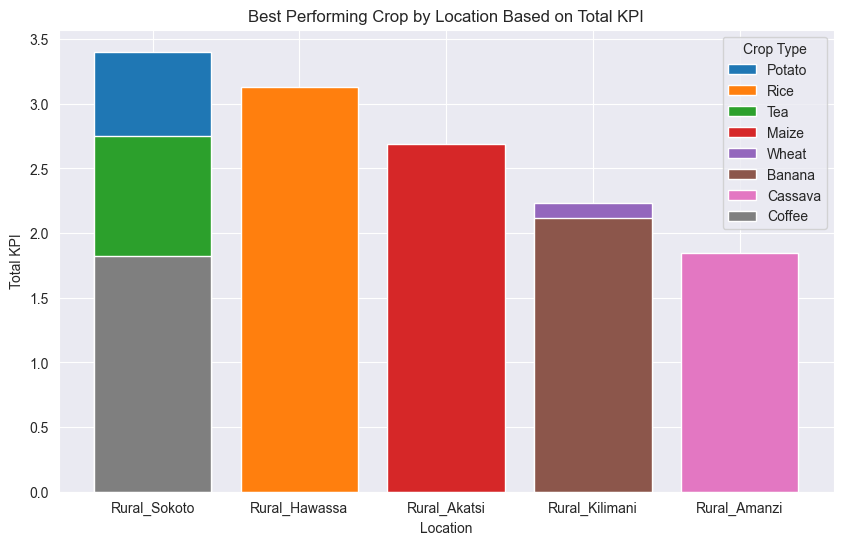

In [187]:
# Sort the data to enable easy plotting
best_location_sorted = best_locations.sort_values('Total KPI', ascending=False)
# Plotting the results
plt.figure(figsize=(10, 6))
for crop in best_location_sorted['Crop_type'].unique():
    subset = best_location_sorted[best_location_sorted['Crop_type'] == crop]
    plt.bar(subset['Location'], subset['Total KPI'], label=crop)

plt.xlabel('Location')
plt.ylabel('Total KPI')
plt.title('Best Performing Crop by Location Based on Total KPI')
plt.legend(title='Crop Type')
plt.show()

In [188]:
metrics

,Crop_type,Location,Annual_yield,Soil_fertility,Slope,Rainfall,Ave_temps,pH,Pollution_level,Plot_size,KPI_Yield_per_unit_area,KPI_Water_Use_Efficiency,KPI_Temp_Impact_Index,KPI_Soil_Fertility_Yield_Ratio,KPI_Pollution_Impact,KPI_Total,Total KPI
0,Banana,Rural_Akatsi,1.858688,0.658204,10.919323,1754.923353,13.403293,6.254463,0.070332,3.954491,0.306633,0.067767,0.318322,0.289634,0.258183,5.972214,1.240539
1,Banana,Rural_Hawassa,1.922905,0.641577,9.610611,1580.080757,13.151420,6.115038,0.039108,4.463722,0.200063,0.132296,0.359504,0.334984,0.499564,10.548840,1.526411
2,Banana,Rural_Kilimani,2.254991,0.597273,7.935109,1058.363636,13.040909,5.759564,0.174271,4.309091,0.451383,0.505832,0.505378,0.538693,0.115020,3.482680,2.116307
3,Banana,Rural_Sokoto,2.321132,0.657899,10.279885,1776.235507,13.614493,5.440984,0.296506,4.484058,0.435984,0.169010,0.492121,0.473947,0.060768,2.409164,1.631830
4,Cassava,Rural_Akatsi,1.493480,0.626265,11.808143,1294.025301,13.539759,5.169879,0.100915,3.200000,0.297650,0.106609,0.163343,0.174700,0.134761,3.552464,0.877063
5,Cassava,Rural_Amanzi,2.104996,0.610000,14.275848,981.890909,14.027273,5.174773,0.235683,4.090909,0.427601,0.511220,0.380545,0.453719,0.072478,2.609812,1.845563
6,Cassava,Rural_Hawassa,2.086399,0.615285,9.977560,1225.076829,13.229268,5.128200,0.175095,4.413415,0.314023,0.331032,0.422314,0.438051,0.104154,3.187787,1.609574
7,Cassava,Rural_Kilimani,2.057868,0.604737,9.530178,1100.171930,13.630044,5.230696,0.398673,4.295175,0.331329,0.399478,0.385547,0.441183,0.032465,1.839335,1.590003
8,Cassava,Rural_Sokoto,1.585533,0.634423,12.421017,1375.691346,13.477885,5.144751,0.558524,3.619231,0.219893,0.105955,0.203419,0.204650,0.007809,1.178969,0.741725
9,Coffee,Rural_Akatsi,1.832454,0.657589,11.777326,1709.964539,13.465248,6.259349,0.076625,3.636879,0.398534,0.072879,0.304194,0.279884,0.231512,5.468471,1.287004


In [189]:
df

,Field_ID,Elevation,Latitude,Longitude,Location,Slope,Rainfall,Min_temperature_C,Max_temperature_C,Ave_temps,Soil_fertility,Soil_type,pH,Pollution_level,Plot_size,Annual_yield,Crop_type,Standard_yield
0,40734,786.05580,-7.389911,-7.556202,Rural_Akatsi,14.795113,1125.2,-3.100000,33.1,15.00,0.62,Sandy,6.169393,8.526684e-02,1.3,0.751354,Cassava,0.577964
1,30629,674.33410,-7.736849,-1.051539,Rural_Sokoto,11.374611,1450.7,-3.900000,30.6,13.35,0.64,Volcanic,5.676648,3.996838e-01,2.2,1.069865,Cassava,0.486302
2,39924,826.53390,-9.926616,0.115156,Rural_Sokoto,11.339692,2208.9,-1.800000,28.4,13.30,0.69,Volcanic,5.331993,3.580286e-01,3.4,2.208801,Tea,0.649647
3,5754,574.94617,-2.420131,-6.592215,Rural_Kilimani,7.109855,328.8,-5.800000,32.2,13.20,0.54,Loamy,5.328150,2.866871e-01,2.4,1.277635,Cassava,0.532348
4,14146,886.35300,-3.055434,-7.952609,Rural_Kilimani,55.007656,785.2,-2.500000,31.0,14.25,0.72,Sandy,5.721234,4.319027e-02,1.5,0.832614,Wheat,0.555076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5649,11472,681.36145,-7.358371,-6.254369,Rural_Akatsi,16.213196,885.7,-4.300000,33.4,14.55,0.61,Sandy,5.741063,3.286828e-01,1.1,0.609930,Potato,0.554482
5650,19660,667.02120,-3.154559,-4.475046,Rural_Kilimani,2.397553,501.1,-4.800000,32.1,13.65,0.54,Sandy,5.445833,1.602583e-01,8.7,3.812289,Maize,0.438194
5651,41296,670.77900,-14.472861,-6.110221,Rural_Hawassa,7.636470,1586.6,-3.800000,33.4,14.80,0.64,Volcanic,5.385873,8.221326e-09,2.1,1.681629,Tea,0.800776
5652,33090,429.48840,-14.653089,-6.984116,Rural_Hawassa,13.944720,1272.2,-6.200000,34.6,14.20,0.63,Silt,5.562508,6.917245e-10,1.3,0.659874,Cassava,0.507595


In [190]:
#subseting numeric column for skewness test
subset= df[['Slope','Rainfall','Ave_temps','Soil_fertility','Annual_yield','pH','Pollution_level','Plot_size']]
subset

,Slope,Rainfall,Ave_temps,Soil_fertility,Annual_yield,pH,Pollution_level,Plot_size
0,14.795113,1125.2,15.00,0.62,0.751354,6.169393,8.526684e-02,1.3
1,11.374611,1450.7,13.35,0.64,1.069865,5.676648,3.996838e-01,2.2
2,11.339692,2208.9,13.30,0.69,2.208801,5.331993,3.580286e-01,3.4
3,7.109855,328.8,13.20,0.54,1.277635,5.328150,2.866871e-01,2.4
4,55.007656,785.2,14.25,0.72,0.832614,5.721234,4.319027e-02,1.5
...,...,...,...,...,...,...,...,...
5649,16.213196,885.7,14.55,0.61,0.609930,5.741063,3.286828e-01,1.1
5650,2.397553,501.1,13.65,0.54,3.812289,5.445833,1.602583e-01,8.7
5651,7.636470,1586.6,14.80,0.64,1.681629,5.385873,8.221326e-09,2.1
5652,13.944720,1272.2,14.20,0.63,0.659874,5.562508,6.917245e-10,1.3


In [191]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5654 entries, 0 to 5653
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Slope            5654 non-null   float64
 1   Rainfall         5654 non-null   float64
 2   Ave_temps        5654 non-null   float64
 3   Soil_fertility   5654 non-null   float64
 4   Annual_yield     5654 non-null   float64
 5   pH               5654 non-null   float64
 6   Pollution_level  5654 non-null   float64
 7   Plot_size        5654 non-null   float64
dtypes: float64(8)
memory usage: 353.5 KB


In [192]:
# Calculating the skewness of all columns in the dataframe
skewness = subset.apply(skew)
skewness

Slope              1.715465
Rainfall           0.058592
Ave_temps          0.030575
Soil_fertility     0.427028
Annual_yield       1.808678
pH                 0.039229
Pollution_level    1.435011
Plot_size          1.552984
dtype: float64

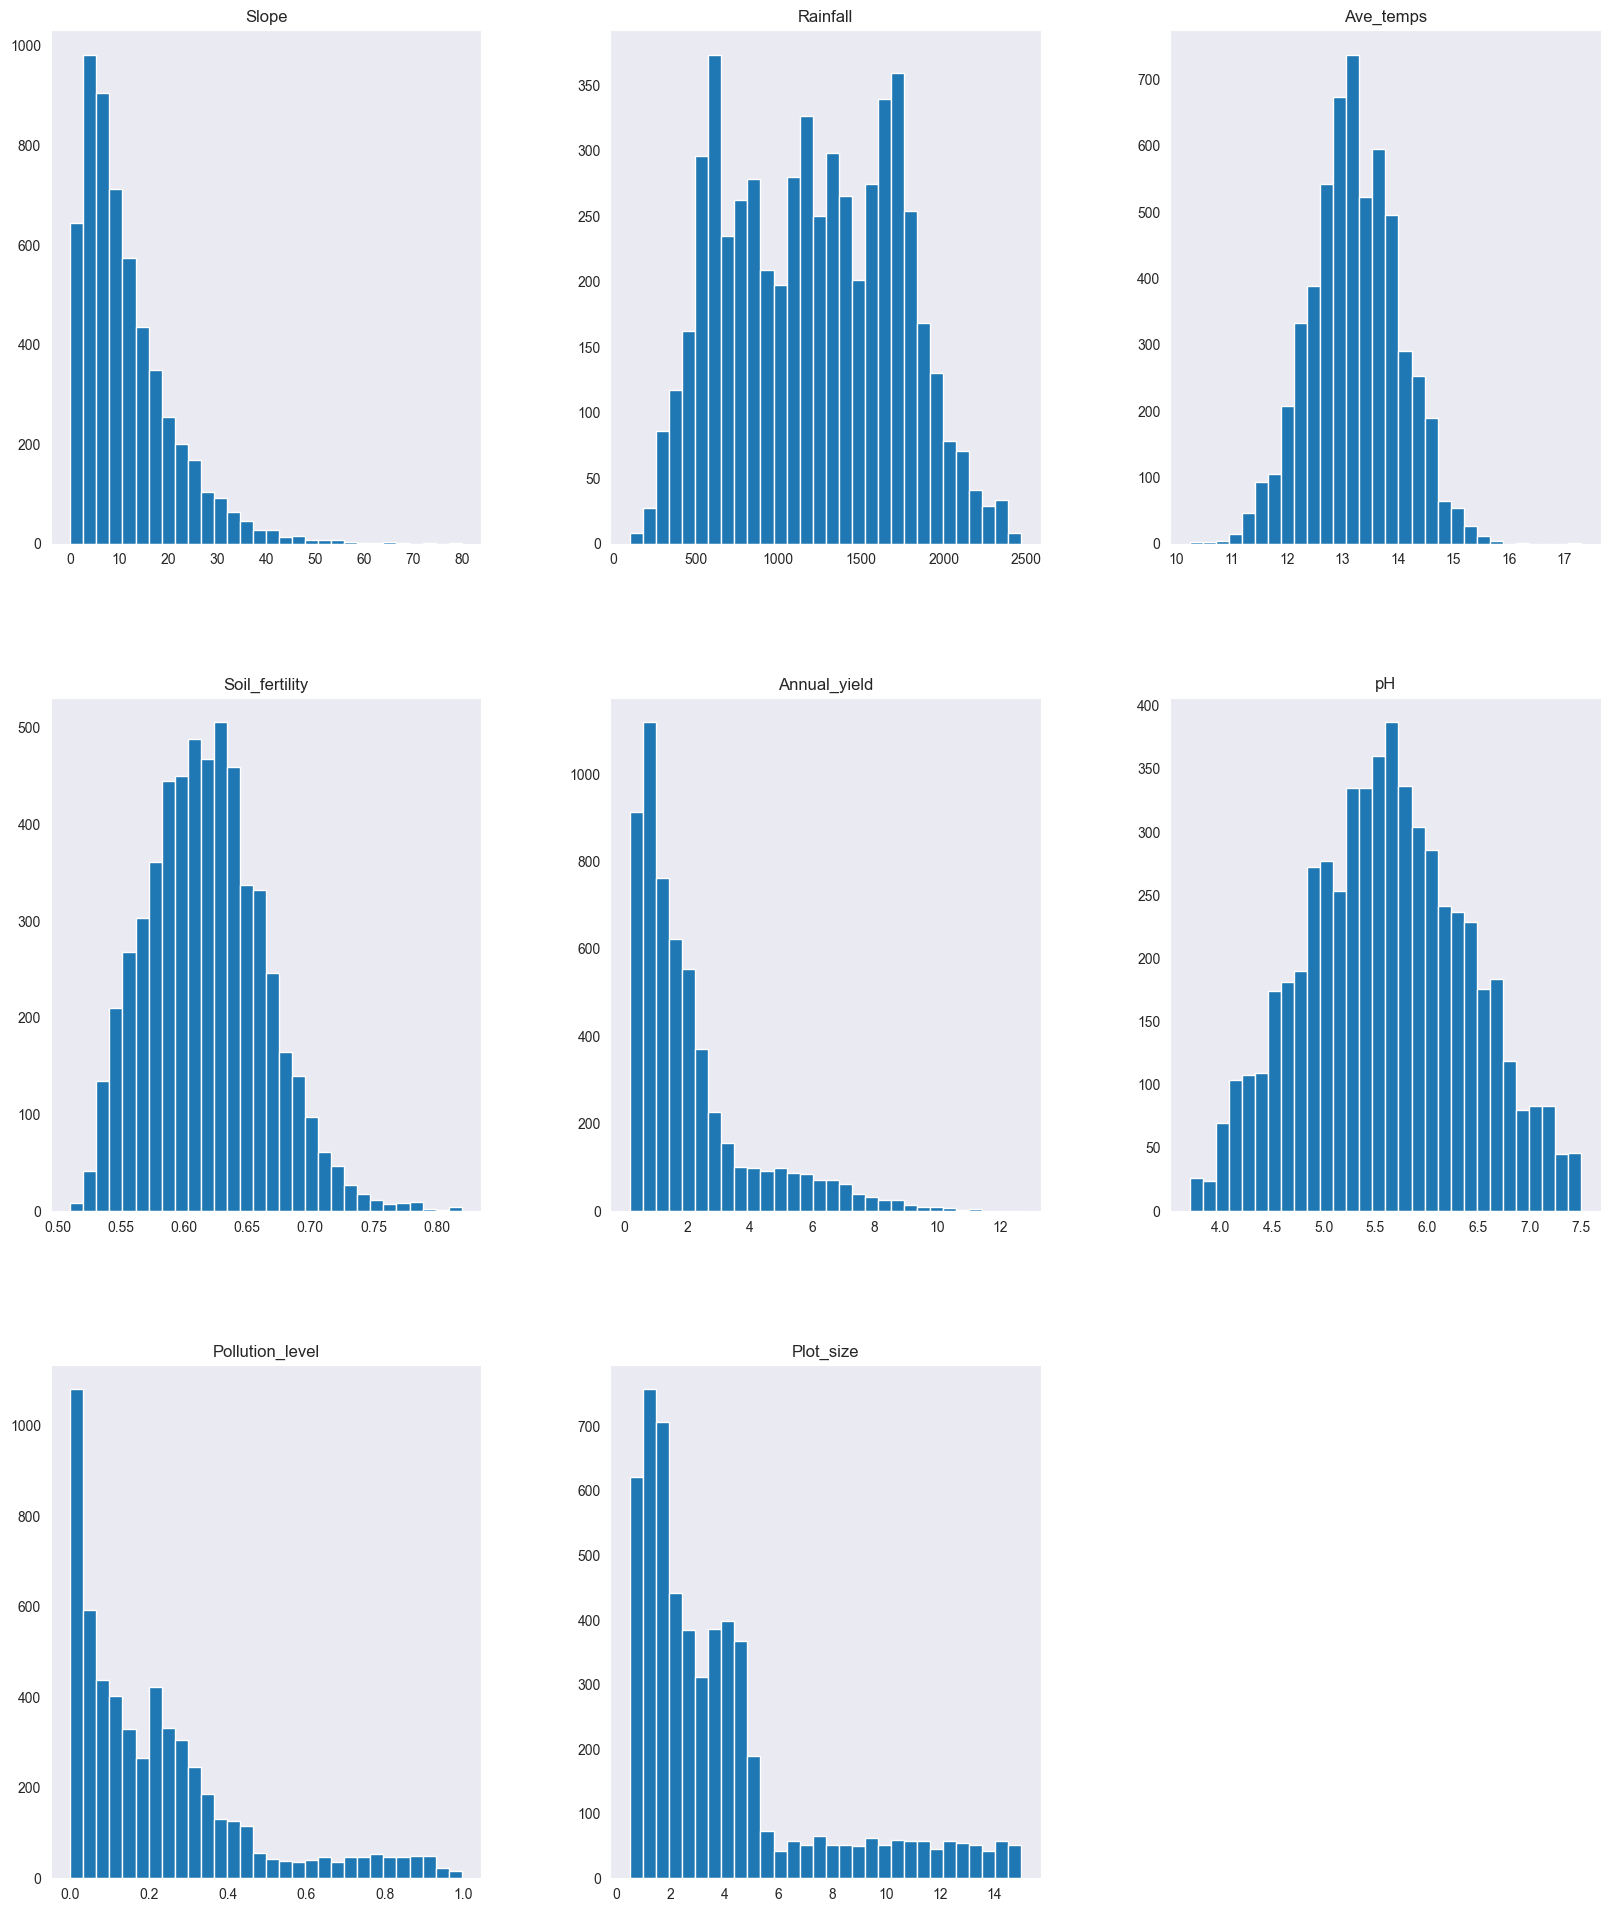

In [193]:
subset.hist(grid=False,figsize=(20,24),bins=30)
plt.show()

In [194]:
# performing a shapiro test to test the normality of the data

#H0- the data is normally ditributed
#H1 - the data is not normally distributed


# Perform Shapiro-Wilk test for each column
results = {}
alpha = 0.05

for col in subset:
    shapiro_statistic_value, shapiro_p_value = shapiro(df[col])
    results[col] = {
        'Shapiro Statistic': shapiro_statistic_value,
        'p-value': shapiro_p_value,
        'Normality': 'not significant result, fail to reject null hypothesis, Gaussian (H0)' 
        if shapiro_p_value > alpha else 'significant result, reject null hypothesis, not Gaussian (H1)'
    }

# Display results
for col, result in results.items():
    print(f"Column: {col}")
    print(f"Shapiro Statistic: {result['Shapiro Statistic']}, p-value: {result['p-value']}")
    print(f"Conclusion: {result['Normality']}")
    print()

Column: Slope
Shapiro Statistic: 0.8584061645442526, p-value: 1.253245937307026e-57
Conclusion: significant result, reject null hypothesis, not Gaussian (H1)

Column: Rainfall
Shapiro Statistic: 0.975400011437778, p-value: 3.7806498403777064e-30
Conclusion: significant result, reject null hypothesis, not Gaussian (H1)

Column: Ave_temps
Shapiro Statistic: 0.9992443091119085, p-value: 0.014808031148821536
Conclusion: significant result, reject null hypothesis, not Gaussian (H1)

Column: Soil_fertility
Shapiro Statistic: 0.9831170080339012, p-value: 1.9479590864461854e-25
Conclusion: significant result, reject null hypothesis, not Gaussian (H1)

Column: Annual_yield
Shapiro Statistic: 0.7928446133772217, p-value: 8.094061841570175e-65
Conclusion: significant result, reject null hypothesis, not Gaussian (H1)

Column: pH
Shapiro Statistic: 0.9940051050884798, p-value: 1.1752895209149772e-14
Conclusion: significant result, reject null hypothesis, not Gaussian (H1)

Column: Pollution_level
S

/Users/promisendiagwalu/.venv/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5654.
  res = hypotest_fun_out(*samples, **kwds)


In [195]:
# Apply log transformation to all elements in the DataFrame
subset_log_transformed = subset.applymap(np.log)

# Display original and transformed data for comparison

print("\nLog-Transformed Data:")
print(subset_log_transformed)


Log-Transformed Data:
         Slope  Rainfall  Ave_temps  Soil_fertility  Annual_yield        pH  \
0     2.694297  7.025716   2.708050       -0.478036     -0.285879  1.819600   
1     2.431384  7.279801   2.591516       -0.446287      0.067532  1.736361   
2     2.428309  7.700250   2.587764       -0.371064      0.792450  1.673725   
3     1.961482  5.795450   2.580217       -0.616186      0.245011  1.673004   
4     4.007472  6.665938   2.656757       -0.328504     -0.183185  1.744184   
...        ...       ...        ...             ...           ...       ...   
5649  2.785825  6.786378   2.677591       -0.494296     -0.494411  1.747644   
5650  0.874449  6.216806   2.613740       -0.616186      1.338230  1.694851   
5651  2.032935  7.369349   2.694627       -0.446287      0.519763  1.683779   
5652  2.635101  7.148503   2.653242       -0.462035     -0.415706  1.716049   
5653  3.560746  6.246882   2.557227       -0.446287     -1.484869  1.626844   

      Pollution_level  Plot_

/var/folders/2_/4z8h40h559d5cvn118j9td7c0000gn/T/ipykernel_3433/2374838974.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  subset_log_transformed = subset.applymap(np.log)


In [196]:
log_subset = pd.DataFrame(subset_log_transformed)
log_subset

,Slope,Rainfall,Ave_temps,Soil_fertility,Annual_yield,pH,Pollution_level,Plot_size
0,2.694297,7.025716,2.708050,-0.478036,-0.285879,1.819600,-2.461970,0.262364
1,2.431384,7.279801,2.591516,-0.446287,0.067532,1.736361,-0.917082,0.788457
2,2.428309,7.700250,2.587764,-0.371064,0.792450,1.673725,-1.027143,1.223775
3,1.961482,5.795450,2.580217,-0.616186,0.245011,1.673004,-1.249364,0.875469
4,4.007472,6.665938,2.656757,-0.328504,-0.183185,1.744184,-3.142140,0.405465
...,...,...,...,...,...,...,...,...
5649,2.785825,6.786378,2.677591,-0.494296,-0.494411,1.747644,-1.112662,0.095310
5650,0.874449,6.216806,2.613740,-0.616186,1.338230,1.694851,-1.830969,2.163323
5651,2.032935,7.369349,2.694627,-0.446287,0.519763,1.683779,-18.616534,0.741937
5652,2.635101,7.148503,2.653242,-0.462035,-0.415706,1.716049,-21.091833,0.262364


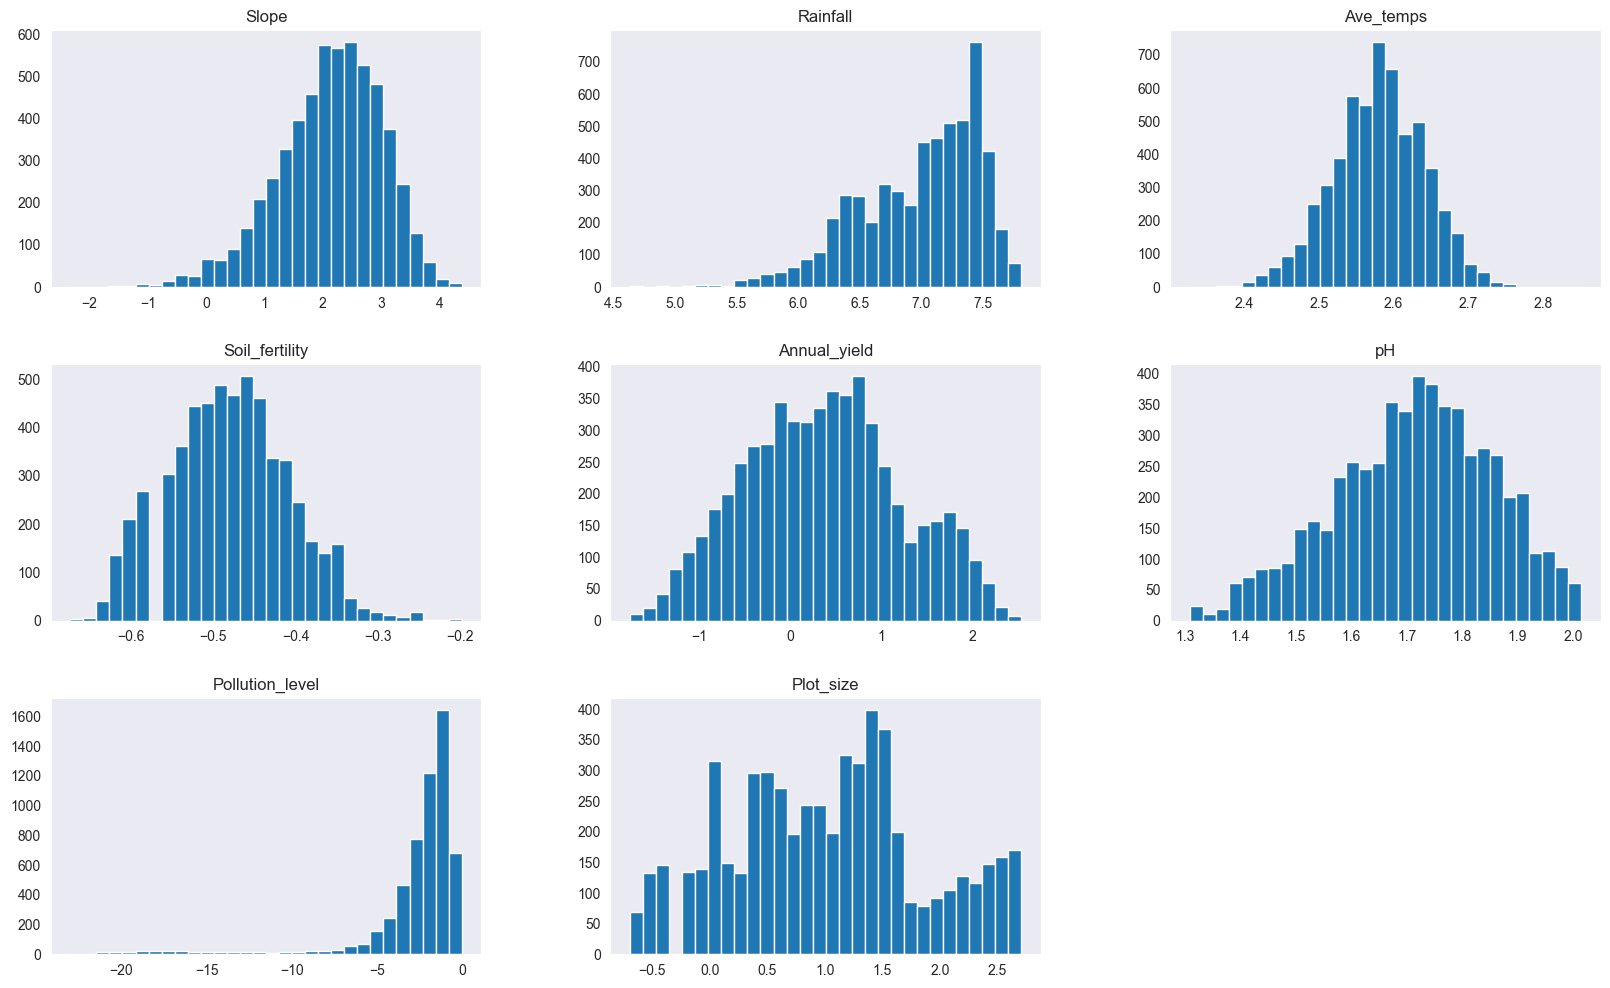

In [197]:
log_subset.hist(grid=False,figsize=(20,12),bins=30)
plt.show()